# **Unveiling Crypto Trends: Deep Dive into Cryptocurrency Analysis using Binance API**

## **About Binance** 

Binance, is a global company that operates the largest cryptocurrency exchange in terms of daily trading volume of cryptocurrencies. Binance was founded in 2017 by Changpeng Zhao, a developer who had previously created high frequency trading software.


> For more info on Binace's API visit this link:
https://binance-docs.github.io/apidocs/spot/en/#introduction 


## In this analysis we will focus on a **Candlestick analysis:**

Candlestick analysis involves **studying price patterns** formed by a series of candlestick charts. Each candlestick represents a **specific time period** (e.g., a day, an hour, or even a minute) and provides **information about the opening, closing, high, and low prices during that period**. The candlestick consists of a rectangular body and two lines, referred to as the upper and lower shadows or wicks.

> For more info on the endpoint used to collect data visit: 
https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data

## Exploring Trends with mplfinance Library

In this notebook, we'll embark on a journey of exploration with the **mplfinance** library. We'll learn how to craft candlestick charts that vividly portray price fluctuations, visualize moving averages that smooth out noise and highlight trends, and even incorporate trading volumes to decipher investor sentiment.

Through hands-on examples and detailed explanations, we'll demystify the art of financial data visualization using the **mplfinance** library. So buckle up as we dive into the world of numbers, trends, and insights, armed with the prowess of Python and the elegance of **mplfinance**.


In [1]:
#importing the necessary libraries for this project
import pandas as pd
import datetime
import requests

import mplfinance as mpf # If you haven't done so previously you will need to install mplfinance
#!pip install mplfinance

## Defining the parameters to use when calling the API

Before making the API call, it's important to define the parameters that will guide the data retrieval process from the Binance server. These parameters tailor the request to our specific needs, allowing us to fetch the relevant historical data for analysis.

Note: the starting and ending times for the endpoint need to be in epoch format. 
> Visit this epoch-converter to make the conversion: https://www.epochconverter.com/

In [2]:
symbol = 'BTCUSDT' #Choosing Bitcoin 

interval = '1d'  # Daily interval. Other allowed intervals include: ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']

start_time = 1672531200000  # Timestamp for January 1, 2023, 00:00:00 UTC
end_time = 1690848000000 # Timestamp for August 1, 2023, 00:00:00 UTC

limit= 1000   # By default the API call returns 500 records with 1000 as the limit

# **We utilize the requests library to interface with the Binance API and retrieve the required data for analysis.**


**API Endpoint**: The variable url is constructed using f-strings to include the symbol (trading pair), interval (timeframe), start time, end time, and limit (number of data points) for the Binance API's historical klines endpoint. This URL specifies the data we want to retrieve from Binance's servers.

**GET Request:** The requests.get(url) function sends an HTTP GET request to the constructed URL. This fetches the historical data from the Binance server based on the parameters we provided.

**JSON Conversion:** The response from the API call is in JSON format. response.json() method converts the JSON content of the response into a Python dictionary or list (depending on the structure of the data). This makes it easier to work with the data within our Python code.

In [66]:
#API endpoint
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}&limit={limit}"

#GET Request
response = requests.get(url)

#JSON Conversion
data = response.json()

## Exploring the retrieved data

In [4]:
#exploring the first record of the ingested data
data[:1]

[[1672531200000,
  '16541.77000000',
  '16628.00000000',
  '16499.01000000',
  '16616.75000000',
  '96925.41374000',
  1672617599999,
  '1604793789.67721260',
  3218355,
  '48548.78168000',
  '803841673.83505870',
  '0']]

In the next step, we perform a count of the data points that have been successfully retrieved from the Binance server. While we initially requested 1000 records based on our preferences, the actual number of retrieved records might vary due to the specific time range we've selected. In this case, the count reveals that we've obtained a smaller dataset containing 213 records.

In [5]:
# counting the number of records
len(data)

213

Using **pandas** we create a dataframe from the data and use the col_names variables as the column names.

In [6]:
#naming the columns
col_names = ["open_time", "Open","High","Low","Close","Volume", "close_time","quote_asset_volume","number_of_trades","taker_buy_asset_volume","taker_buy_quote_volume","ignored_data" ]

#creating a df
df = pd.DataFrame(data, columns=col_names)

In [7]:
#Exploring the df
df.head()

,open_time,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_volume,ignored_data
0,1672531200000,16541.77000000,16628.00000000,16499.01000000,16616.75000000,96925.41374000,1672617599999,1604793789.67721260,3218355,48548.78168000,803841673.83505870,0
1,1672617600000,16617.17000000,16799.23000000,16548.70000000,16672.87000000,121888.57191000,1672703999999,2034683215.26787840,4036118,60925.25948000,1017074780.69180630,0
2,1672704000000,16672.78000000,16778.40000000,16605.28000000,16675.18000000,159541.53733000,1672790399999,2662765916.32566840,5097596,79595.76246000,1328471402.71367460,0
3,1672790400000,16675.65000000,16991.87000000,16652.66000000,16850.36000000,220362.18862000,1672876799999,3709833209.84536520,6310703,109747.11502000,1847617011.38537700,0
4,1672876800000,16850.36000000,16879.82000000,16753.00000000,16831.85000000,163473.56641000,1672963199999,2751080253.81773340,4842014,80959.57162000,1362471754.05329920,0


In [8]:
#Exploring the tail of the df
df.tail()

,open_time,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_volume,ignored_data
208,1690502400000,29222.78000000,29542.22000000,29123.12000000,29314.14000000,23993.61627000,1690588799999,702705076.83786600,543177,11422.36141000,334588917.08832910,0
209,1690588800000,29314.14000000,29406.92000000,29256.18000000,29352.90000000,10851.36844000,1690675199999,318276733.87664310,339750,5443.09222000,159659088.16467640,0
210,1690675200000,29352.90000000,29449.00000000,29033.24000000,29281.09000000,15706.97441000,1690761599999,459830379.65098240,454846,7720.41654000,226012721.37053510,0
211,1690761600000,29281.09000000,29530.00000000,29101.80000000,29232.25000000,22605.48964000,1690847999999,663025204.20723460,563115,11029.22580000,323482162.29208640,0
212,1690848000000,29232.26000000,29739.25000000,28585.70000000,29705.99000000,44719.65162000,1690934399999,1299160215.07792410,900141,21831.75056000,634595648.94353090,0


Before we continue with analysing the retrieved data we need to inspect it to see if we need to perfome **data cleaning** tasks.
The first step would be to inspect the data types of each column.

In [9]:
# Inspecting the data types of the variables
df.dtypes

open_time                  int64
Open                      object
High                      object
Low                       object
Close                     object
Volume                    object
close_time                 int64
quote_asset_volume        object
number_of_trades           int64
taker_buy_asset_volume    object
taker_buy_quote_volume    object
ignored_data              object
dtype: object

To enhance our dataset's interpretability, we're addressing the time-related columns, 'open_time' and 'close_time'. Initially provided in the **epoch format**, these timestamps are now being converted into human-readable datetime format. This transformation enables us to understand trading periods and price movements more intuitively.

To perform this conversion, we utilize Python's **datetime** module. We first import this module for usage. Subsequently, we apply the **pd.to_datetime()** function from the pandas library. This function converts the epoch timestamps in milliseconds to datetime format, enhancing our dataset's readability.

In [12]:
import datetime 
# as we noticed before 'open_time' and 'close_time' are in epoch format. We need to convert them into datetime 

df['open_time'] = pd.to_datetime(df["open_time"], unit='ms')
df['close_time'] = pd.to_datetime(df["close_time"], unit='ms')

df[['open_time','close_time']].head()

,open_time,close_time
0,2023-01-01,2023-01-01 23:59:59.999
1,2023-01-02,2023-01-02 23:59:59.999
2,2023-01-03,2023-01-03 23:59:59.999
3,2023-01-04,2023-01-04 23:59:59.999
4,2023-01-05,2023-01-05 23:59:59.999


The second step before continuing with the analysis is to modify the data types of specific columns in our DataFrame. The columns identified for this transformation include price-related attributes such as 'Open,' 'High,' 'Low,' 'Close,' as well as trade volumes and other metrics which were categorized as 'object' when in fact they are 'float'.

To facilitate this data type conversion, we establish a list named col_dtypes encompassing the names of the columns requiring modification. These columns are currently in object (obj) data type, and we intend to convert them to the more suitable float data type for numerical operations.

In [13]:
## changing dtypes of columns from obj to float
col_dtypes = ["Open","High","Low","Close","Volume","quote_asset_volume","taker_buy_asset_volume","taker_buy_quote_volume"]

#iterate over every column and convert to float
for val in col_dtypes:
    df[val] = df[val].astype(float)

Now that the data has been inspected and cleaned we can move on to analyse it.

## Exploring Trends with mplfinance Library

**mplfinance**, short for "Matplotlib Finance," is specifically designed to aid financial data visualization. It provides a range of charting capabilities, including candlestick charts, line plots, and the integration of various technical indicators. Whether you're an experienced trader or a curious data enthusiast, this library can be a game-changer in understanding market dynamics.

By harnessing the capabilities of **mplfinance**, we can create comprehensive charts that not only display price movements but also include trading volumes, moving averages, and more. These charts serve as windows into the intricate world of cryptocurrencies, enabling us to identify patterns, trends, and potential trading opportunities.

In [14]:
# to plot using the mpl finance library, we need 'open_time' to be set as index
df = df.set_index('open_time')

In preparation for visualizing the data using the **mplfinance library**, we need to set the **'open_time'** column as the index for our DataFrame. The **index** serves as a reference for the time-based data, and this adjustment ensures that our time-series data is appropriately aligned for plotting.

In [15]:
#exploring the documentation of mpf.plot
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



>For more info on mplfinance visit the repository's documentation on github:

https://github.com/matplotlib/mplfinance/blob/master/readme.ipynb

Now that everything is ready we can make our first chart using **mplfinance.**

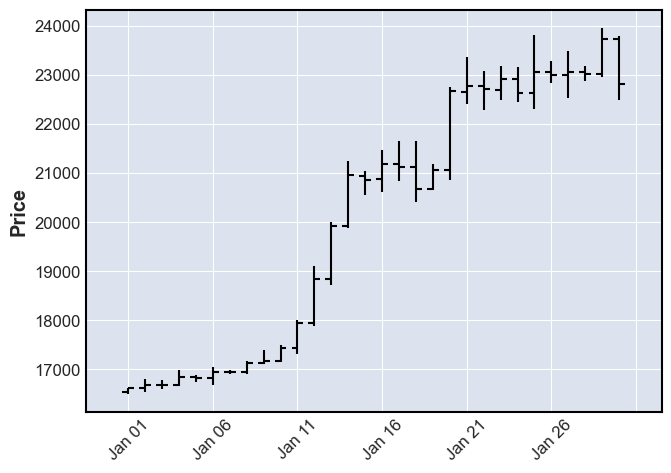

In [44]:
# Plotting the chart with default parameters
mpf.plot(df.iloc[:30])

The mplfinance library offers a wide range of **customization** options for charting. You can adjust aspects like chart type, appearance, colors, annotations, and more to align with your analysis goals.

In below code, the type parameter is set to **'candle'**. This choice instructs the library to create a **candlestick chart** for the given data. 

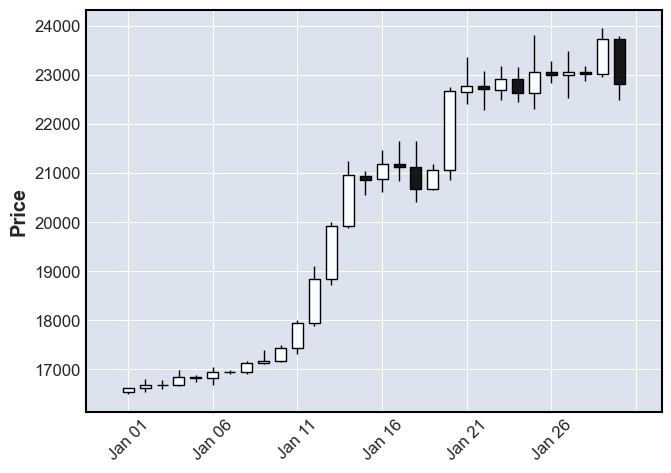

In [17]:
#candlestick chart of the first 30 records
mpf.plot(df.iloc[:30], type='candle')

If you prefer to visualize data in a **line plot** format rather than a candlestick chart, the mplfinance library offers the flexibility to do so. You can achieve this by specifying the type parameter as **'line'**. Line plots provide a clear representation of price trends over time.

Moreover, the library empowers you to integrate **moving averages** into your analysis effortlessly. By using the **mav** parameter, you can plot moving averages, which are essential tools in technical analysis. In the code, setting mav=7 generates a 7-day rolling average line plot, smoothing out short-term fluctuations and highlighting underlying trends. Furthermore, you can apply multiple moving averages simultaneously (ex. mav=(7,10,20) )  , enhancing your analysis with additional insights.  

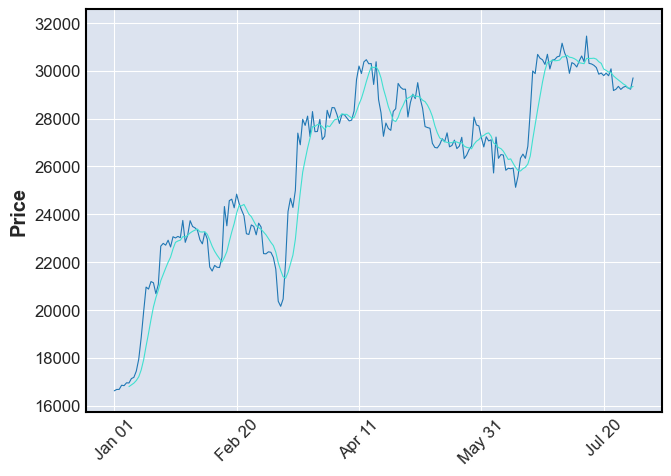

In [41]:
mpf.plot(df, type='line', mav=7)

An alternative chart that can be plotted is **'renko'**. 

Renko is a type of chart used in technical analysis to display price movements of an asset, such as stocks, currencies, or cryptocurrencies. Unlike traditional candlestick charts or line charts, which are based on time intervals, Renko charts are constructed based on price movements. This makes Renko charts particularly useful for filtering out market noise and emphasizing significant price trends.

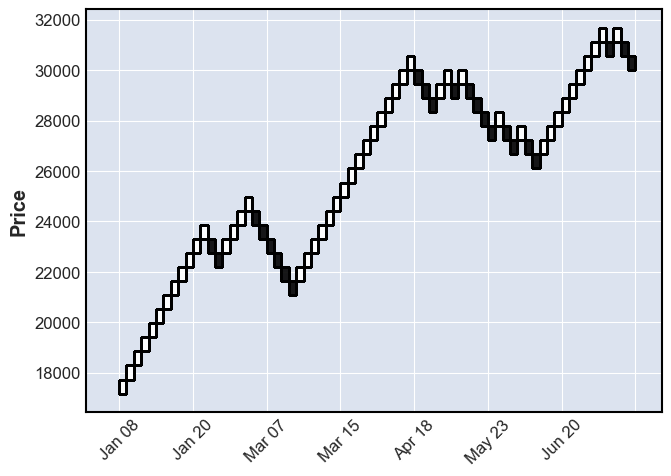

In [43]:
mpf.plot(df, type='renko')

Incorporating **transaction volume** data into a candlestick chart can significantly enhance our understanding of market dynamics. By setting the **volume parameter** to **True**, we're enabling the visualization of transaction volumes alongside the candlestick price movements on a single chart.

This feature is invaluable for comprehending investor behavior and identifying significant market trends. By observing the volume of transactions corresponding to specific price movements, we can gain insights into the level of participation, market sentiment, and potential trend reversals.

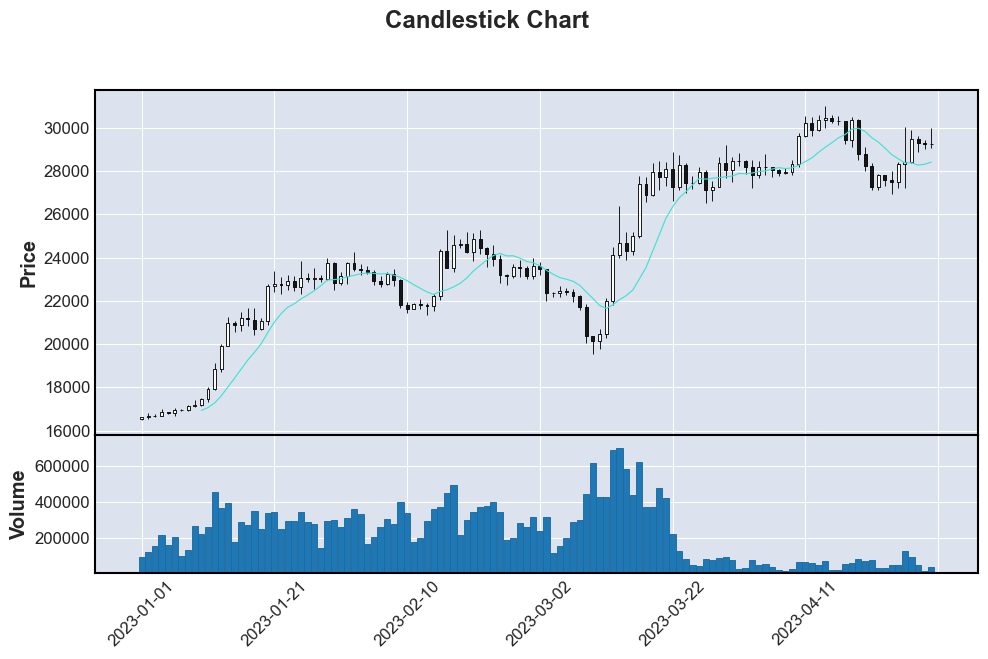

In [67]:
mpf.plot(df.iloc[:120], type='candle',
         title='Candlestick Chart',
         ylabel='Price',
         mav=10,
         volume=True,
         show_nontrading=False,
         datetime_format='%Y-%m-%d',
         figscale=1.2,
         figratio=(16, 9))